1. 신경망의 역전파 알고리즘
2. 최적화 알고리즘
3. 자연어 처리(NLP)
4. 컴퓨터 비젼
5. 강화학습
6. 생성모델
7. 하이퍼 파라메터 최적화
8. 시계열 데이터 분석
9. AutoML
10. Explainable AI(설명 가능한 AI)

역전파 알고리즘 - 경사하강법
  - y = mx +b

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x_data = np.array([1,2,3,4], dtype=np.float32)
y_data = np.array([3,5,7,9], dtype=np.float32)
# m 과 b를 구해보자  m = 2, b = 1
# m 과 b가 초기값이 있어야 첫번째 계산을 할 수 있다
m = 0.0
b = 0.0
# 오차는 평균제곱오차
def compute_loss(m,b,x,y):
  predict = m*x+b
  return np.mean((predict-y)**2)

# 손실함수의 기울기 계산(미분)
def compute_gradient(m,b,x,y):
  predict = m*x + b

  N = len(x)
  dm = (-2/N)*np.sum(x* ( y-predict)) # 손실 함수의 m에 대한 미분
  db = (-2/N)*np.sum(y - predict)   # 손실 함수의 b에 대한 미분
  return dm,db

from tqdm import tqdm
# 경사하강법을 통한 학습
iteration = tqdm(range(5000))
for i in iteration:
  # 손실함수의 기울기
  dm,db = compute_gradient(m,b,x_data,y_data)
  # 매개변수에 업데이트(기울기 사용)
  m = m - 0.01*dm
  b = b - 0.01*db
  iteration.set_description(f"loss : {compute_loss(m,b,x_data,y_data)}")


print(f'final m:{m} b:{b}')



loss : 0.0: 100%|██████████| 5000/5000 [00:15<00:00, 317.79it/s]

final m:2.0000001132488583 b:0.999999852180471


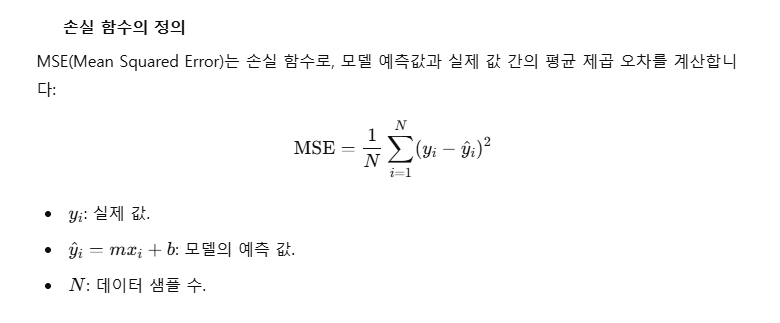

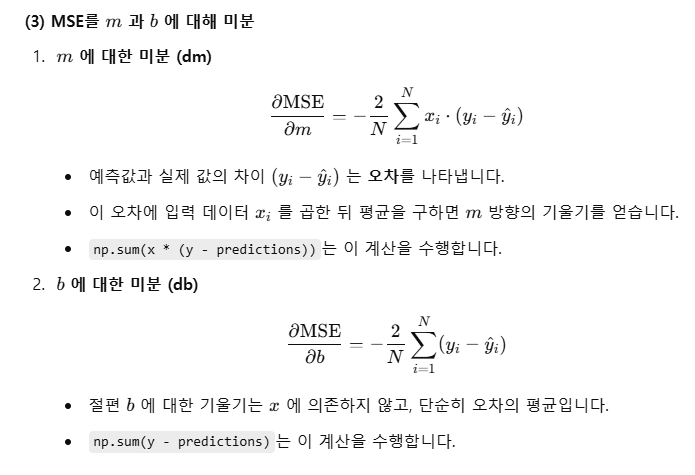

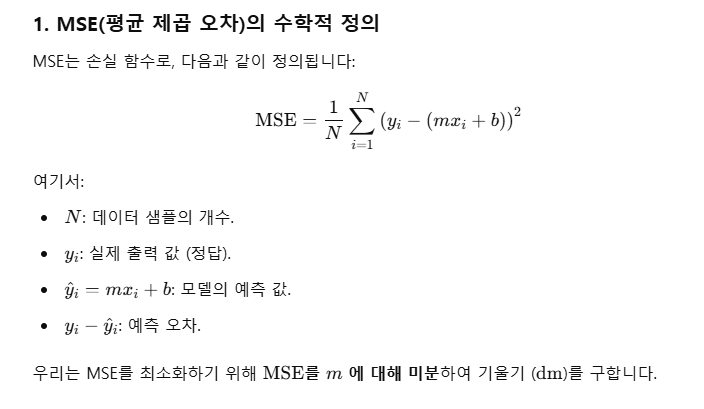

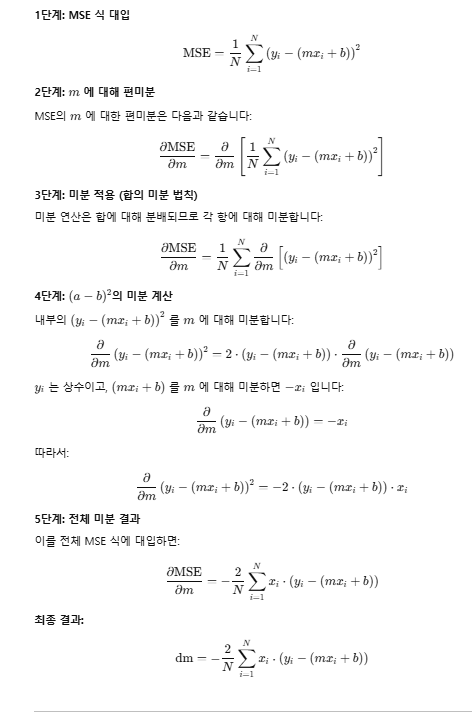

In [4]:
# y = mx + b
import numpy as np
x = np.array([1,2,3],dtype = float)
y = np.array([2,4,6],dtype = float)
m,b = 0,0
N = len(x)

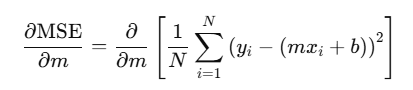

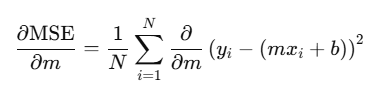

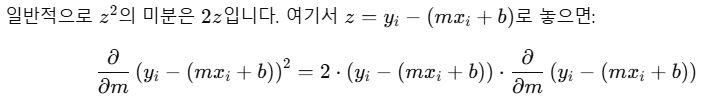

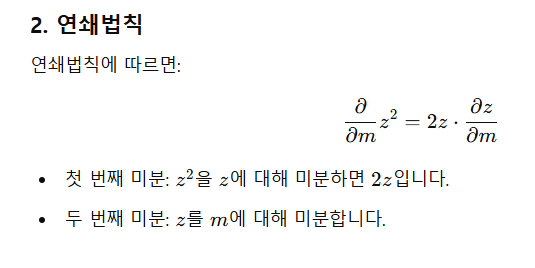

위의 과정을 단계적으로 살펴보겠습니다.

1. 데이터 준비

In [5]:
import numpy as np

# 데이터
x = np.array([1, 2, 3], dtype=float)  # 입력 데이터
y = np.array([2, 4, 6], dtype=float)  # 실제 출력 데이터

# 초기 값
m = 0.0  # 기울기
b = 0.0  # 절편

2. Z정의

y = yi - (mxi + b)

In [6]:
# 모델의 예측값
predictions = m * x + b  # y_hat = mx + b

# z 계산
z = y - predictions  # z = y - (mx + b)
print(f"z: {z}")


z: [2. 4. 6.]


3. Z^2 계산

In [7]:
# 각 셈플에 대해 z^2을 계산합니다.
# z^2 계산
z_squared = z ** 2
print(f"z^2: {z_squared}")

z^2: [ 4. 16. 36.]


4. 연쇄법칙 적용

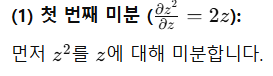

In [8]:
# 첫 번째 미분 (∂z^2 / ∂z)
partial_z_squared = 2 * z
print(f"∂z^2 / ∂z: {partial_z_squared}")


∂z^2 / ∂z: [ 4.  8. 12.]


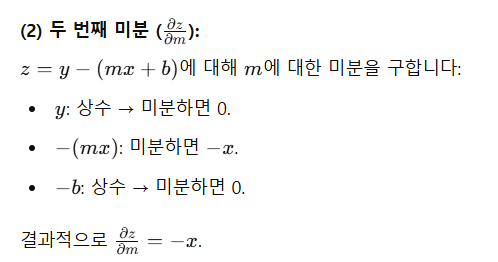

In [9]:
# 두 번째 미분 (∂z / ∂m)
partial_z_m = -x
print(f"∂z / ∂m: {partial_z_m}")


∂z / ∂m: [-1. -2. -3.]


5 연쇄법칙적용

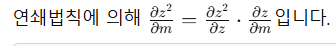

In [10]:
# 연쇄법칙 적용
gradient_m = partial_z_squared * partial_z_m
print(f"Gradient with respect to m: {gradient_m}")


Gradient with respect to m: [ -4. -16. -36.]


6. 평균을 통해 최종 미분 값 계산

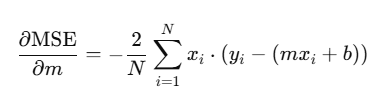

In [11]:
# 평균 기울기 계산 (MSE의 m에 대한 미분)
dm = (-2 / len(x)) * np.sum(gradient_m)
print(f"Final gradient (dm): {dm}")


Final gradient (dm): 37.33333333333333
